# Inferential
### What is the most used technology in Software Engineering for a mid-sized level company? Can we say the same technology is the most popular for a big-sized company or not? 

In [202]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

#### will not be using 2018 dataset in this question because it has no technology column

In [203]:
df_2019 = pd.read_csv('./Dataset/2019.csv')
df_2020 = pd.read_csv('./Dataset/2020.csv')

### Lets do some exploration On the company size: 

- Bar chart: Create a bar chart that shows the frequency of each technology used by mid-sized companies. You can use different colors to highlight the most popular technologies. Then, create a second bar chart for big-sized companies and compare the frequency of each technology to see if there are any similarities or differences.

- Pie chart: Create a pie chart that shows the percentage of mid-sized companies using each technology. This can give you a quick overview of the most popular technologies. Then, create a second pie chart for big-sized companies and compare the percentage of each technology to see if there are any significant differences.

- Stacked bar chart: Create a stacked bar chart that shows the distribution of technologies used by mid-sized and big-sized companies. You can use different colors to represent each technology and stack them on top of each other to show the total frequency of technologies used by each company size.

- Heatmap: Create a heatmap that shows the frequency of each technology used by mid-sized and big-sized companies. You can use a color scale to represent the frequency and plot the technologies on the y-axis and the company size on the x-axis. This can help you identify any similarities or differences in technology usage between the two company sizes.

In [204]:
print(df_2019['Company size'].unique())
print(df_2020['Company size'].unique())

['50-100' '10-50' '1000+' '100-1000' 'up to 10' nan]
['51-100' '101-1000' '11-50' '1000+' nan 'up to 10']


#### Let's drop the nan

In [205]:
print("2019 has total rows = ",len(df_2019))
print("2020 has total rows = ",len(df_2020))
df_2019_cpy=df_2019.dropna(subset=['Company size'])
df_2020_cpy=df_2020.dropna(subset=['Company size'])
print("-------------------After dropping null values-------------------")
print("2019 has total rows = ",len(df_2019_cpy))
print("2020 has total rows = ",len(df_2020_cpy))

2019 has total rows =  991
2020 has total rows =  1253
-------------------After dropping null values-------------------
2019 has total rows =  977
2020 has total rows =  1235


In [206]:
print(df_2019_cpy['Company size'].unique())
print(df_2020_cpy['Company size'].unique())

['50-100' '10-50' '1000+' '100-1000' 'up to 10']
['51-100' '101-1000' '11-50' '1000+' 'up to 10']


#### We can clearly see that for 2020 , the ranges are quite unmatched with 2019 by just 1 person , lets just make it consistent for all as this 1 person wouldnot affect size of company

In [207]:
import warnings
warnings.filterwarnings('ignore')
df_2020_cpy['Company size'].replace('11-50','10-50', inplace=True)
df_2020_cpy['Company size'].replace('51-100','50-100', inplace=True)
df_2020_cpy['Company size'].replace('101-1000','100-1000', inplace=True)
print(df_2020_cpy['Company size'].unique())

['50-100' '100-1000' '10-50' '1000+' 'up to 10']


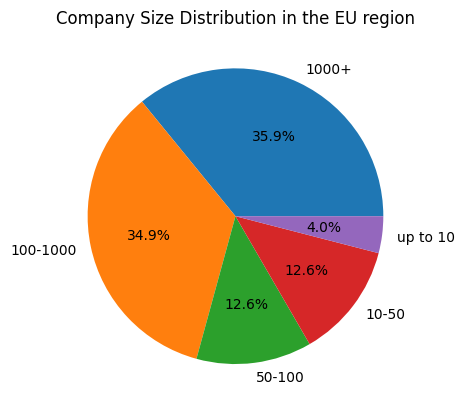

In [208]:
company_size = pd.concat([df_2019_cpy['Company size'], df_2020_cpy['Company size']])
company_size_count=company_size.value_counts()
plt.pie(company_size_count, labels=company_size_count.index, autopct='%1.1f%%')
plt.title('Company Size Distribution in the EU region')
plt.show()

### By inspecting the "Your main technology / programming language" column in 2020 , we found that it needs some data cleaning.

- The same technology is written several times with different capitalization
- The same technology could be written with different acronyms e.g: node , nodejs, node.js
- we might need to remove leading / trailing white spaces
- we need to delete the nan values 
- we need to correct some miss-spelled words 
- need to resolve the aggregated technology column 
    - so separate it by "/"  OR "," OR "+" OR "&" OR  "white spaces"  OR ":" and duplicate the rows.
- '('  ')'  sould be replaced by white space as it could be (django)


In [209]:
unique_languages=df_2020_cpy['Your main technology / programming language'].unique()


# some replacements are needed to make the data consistent
df_2020_cpy['Your main technology / programming language']=df_2020_cpy['Your main technology / programming language'].str.lower()


df_2020_cpy['Your main technology / programming language']=df_2020_cpy['Your main technology / programming language'] \
    .str.replace('c\+\+', 'cpp') \
    .str.replace('javascript','js') \
    .str.replace('.net core', '.net_core') \
    .str.replace('ruby on rails','ror') \
    .str.replace('node.js','node') \
    .str.replace('nodejs','node') \
    .str.replace('nodsjs','node') \
    .str.replace('autonomous driving','autonomous_driving') \
    .str.replace('computer networking ','computer_networking') \
    .str.replace('network security','network_security') \
    .str.replace('virtualisation platforms','virtualisation_platforms') \
    .str.replace('cloud computing','cloud_computing') \
    .str.replace('network automation','network_automation') \
    .str.replace('distributed systems stuff','distributed_systems_stuff') \
    .str.replace('data science','data_science') \
    .str.replace('apache spark','apache_spark') \
    .str.replace('react.js','react') \
    .str.replace('google cloud platform','google_cloud_platform') \
    .str.replace('network security','network_security') \
    .str.replace('apache','apache_spark') \
    .str.replace('(',' ') \
    .str.replace(')',' ') \
    .str.replace('pythin','python') \
    .str.replace('pyrhon','python') \
    .str.replace('power bi','power_bi') \
    .fillna('')
    

    

df_2020_cpy['Your main technology / programming language']=df_2020_cpy['Your main technology / programming language']\
    .str.strip()\
    .str.split('[+,/&: ]')\
    .apply(lambda x: list(filter(None, x)))


df_2020_cpy=df_2020_cpy.explode('Your main technology / programming language').dropna(subset=['Your main technology / programming language'])



unique_cleaned_languages=df_2020_cpy['Your main technology / programming language'].unique()

print("There were ",len(unique_languages)," unique languages before cleaning")
print("There are ",len(unique_cleaned_languages)," unique languages after cleaning")


There were  257  unique languages before cleaning
There are  169  unique languages after cleaning


In [213]:
# write the results to a text file
with open('langs.txt', 'w', encoding='utf-8') as file:
    for val in df_2020_cpy['Your main technology / programming language']:
        file.write(f'{val}\n')

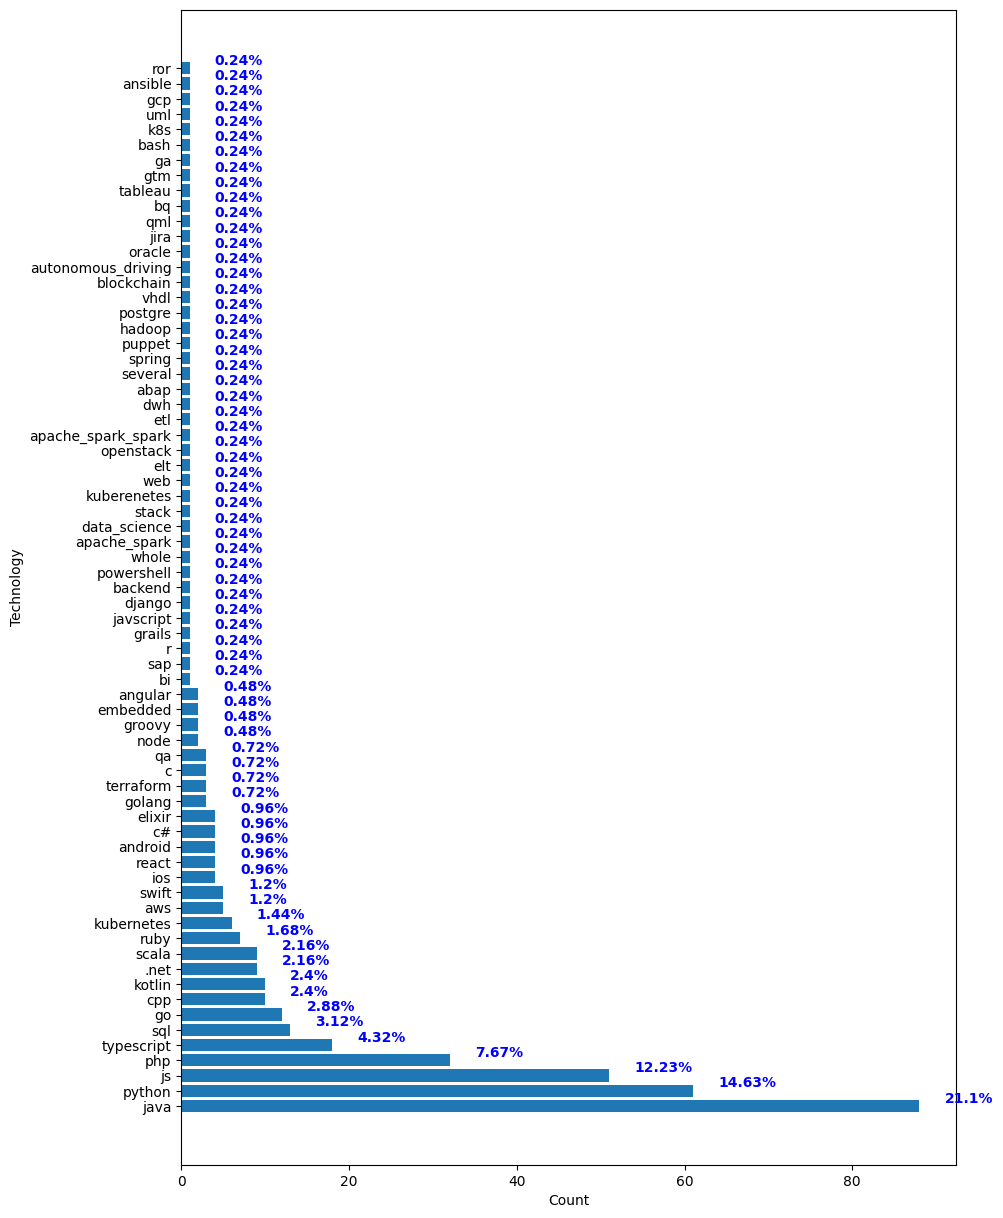

In [242]:
df_medium_sized_company = df_2020_cpy[df_2020_cpy['Company size'] == '100-1000']


counts_medium = df_medium_sized_company['Your main technology / programming language'].value_counts()

medium_sized_freq = sorted([(tech, count) for tech, count in zip(counts_medium.index, counts_medium.values)], key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots(figsize=(10, 15))

ax.barh(counts_medium.index, counts_medium.values)

ax.set_xlabel('Count')
ax.set_ylabel('Technology')

# Add percentage text on the bars
for i, v in enumerate(counts_medium.values):
    ax.text(v + 3, i + .25, str(round((v / counts_medium.sum()) * 100, 2)) + '%', color='blue', fontweight='bold')

plt.show()

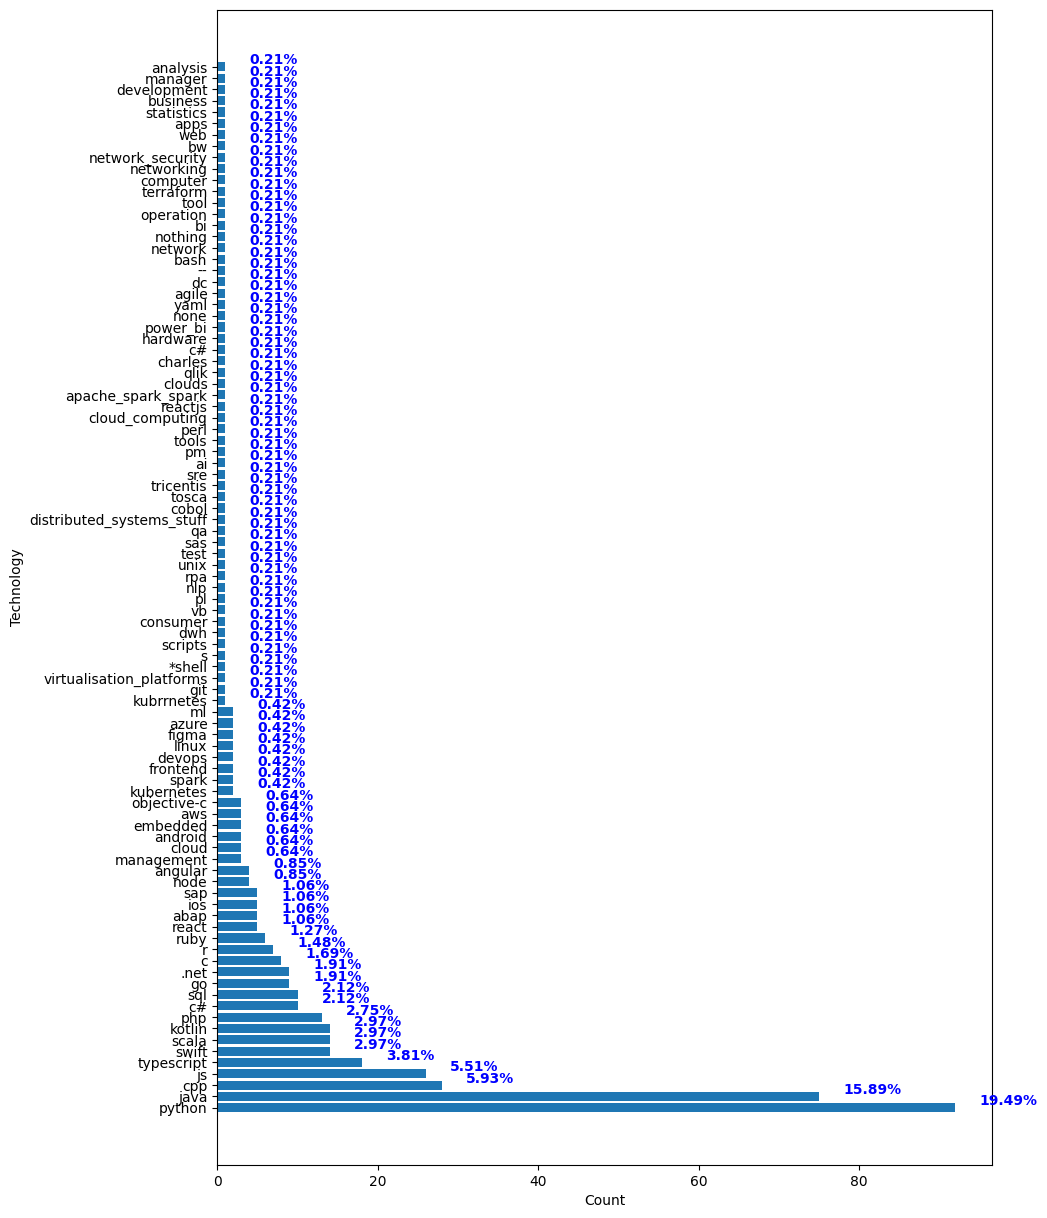

In [241]:
df_big_sized_company = df_2020_cpy[df_2020_cpy['Company size'] == '1000+']


counts_big = df_big_sized_company['Your main technology / programming language'].value_counts()

big_sized_freq = sorted([(tech, count) for tech, count in zip(counts_big.index, counts_big.values)], key=lambda x: x[1], reverse=True)



fig, ax = plt.subplots(figsize=(10, 15))

ax.barh(counts_big.index, counts_big.values)

ax.set_xlabel('Count')
ax.set_ylabel('Technology')

# Add percentage text on the bars
for i, v in enumerate(counts_big.values):
    ax.text(v + 3, i + .25, str(round((v / counts_big.sum()) * 100, 2)) + '%', color='blue', fontweight='bold')

plt.show()


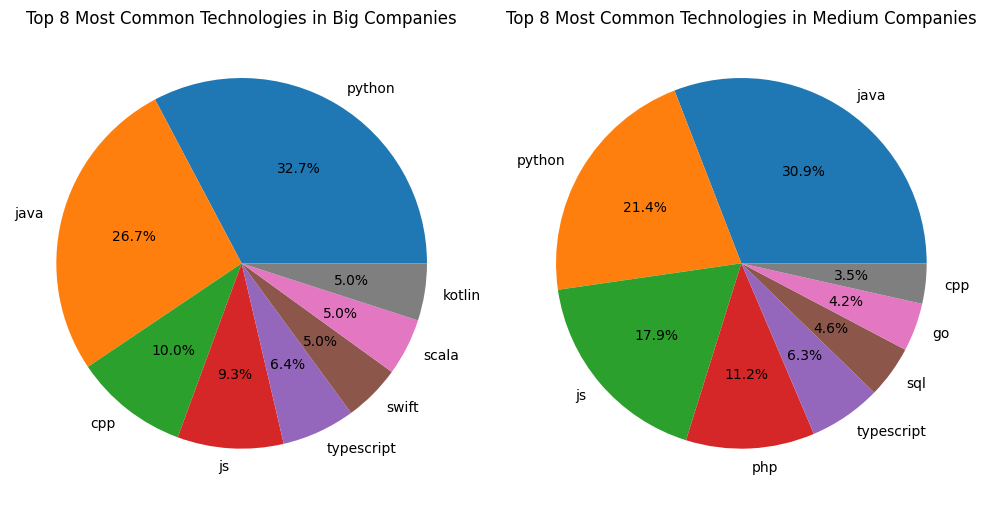

In [251]:
# Slice the counts to only include the top 8 values
counts_big_top_8 = counts_big[:8]
counts_medium_top_8 = counts_medium[:8]

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))

# Plot the first pie chart on the first subplot
ax1.pie(counts_big_top_8, labels=counts_big_top_8.index, autopct='%1.1f%%')
ax1.set_title('Top 8 Most Common Technologies in Big Companies')

# Plot the second pie chart on the second subplot
ax2.pie(counts_medium_top_8, labels=counts_medium_top_8.index, autopct='%1.1f%%')
ax2.set_title('Top 8 Most Common Technologies in Medium Companies')

# Set the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()

In [215]:
# write the results to a text file
# with open('results.txt', 'w') as file:
#     for tech, count in results:
#         file.write(f'{tech}: {count}\n')

I apologize for the confusion. Based on your clarification, the null and alternative hypotheses for your chi-square test would be:

Null hypothesis (H0): There is no significant difference in the proportions of companies that use Python as their most used technology between mid-sized and big-sized companies.

Alternative hypothesis (HA): The proportion of companies that use Python as their most used technology is significantly different between mid-sized and big-sized companies.

To clarify, the alternative hypothesis does not state that Python is the most popular technology in both mid-sized and big-sized companies, but rather that there is a significant difference in the proportions of companies using Python as their most used technology between the two groups.

To conduct the test, you would still create a contingency table with the counts of companies in each group using Python and other technologies as their most used technology. You would then calculate the expected frequencies assuming that there is no association between company size and most used technology. You would then calculate the chi-square test statistic and compare it to the critical value at the chosen level of significance.

If the calculated chi-square test statistic is greater than the critical value, you would reject the null hypothesis and conclude that there is a significant difference in the proportions of companies using Python as their most used technology between mid-sized and big-sized companies.

If the calculated chi-square test statistic is less than the critical value, you would fail to reject the null hypothesis and conclude that there is no significant difference in the proportions of companies using Python as their most used technology between mid-sized and big-sized companies.

I hope this helps clarify the hypotheses and approach for your chi-square test.

________________________________________________________________________________________________________________________________________________

Sure, I'd be happy to provide more information about chi-square tests and when to use them.

Chi-square tests are statistical tests used to determine whether there is a significant difference between observed frequencies in a sample and expected frequencies. The test is used for categorical data, such as nominal or ordinal data, where the data is divided into categories or groups.

There are different types of chi-square tests, including:

Goodness-of-fit test: This test is used to determine whether a sample comes from a population with a specific distribution. For example, you might use a goodness-of-fit test to determine whether the observed frequencies of different colors of M&Ms in a bag match the expected frequencies based on the manufacturer's specifications.

Test for independence: This test is used to determine whether there is a relationship between two categorical variables. For example, you might use a test for independence to determine whether there is a relationship between gender and voting behavior in a political election.

Test for homogeneity: This test is used to determine whether two or more groups have the same proportions for a particular categorical variable. For example, you might use a test for homogeneity to determine whether there is a significant difference in the proportions of people who prefer different brands of soft drinks in different regions of the country.

To determine which type of chi-square test to use, you need to consider your research question and the nature of your data. If you want to test whether a sample follows a specific distribution, you would use a goodness-of-fit test. If you want to test whether two variables are independent, you would use a test for independence. If you want to compare the proportions of different groups for a categorical variable, you would use a test for homogeneity.

It's important to note that chi-square tests have assumptions, and the validity of the test depends on the sample size and the distribution of the data. Therefore, it is important to consult with a statistician or data analyst to determine the appropriate chi-square test and ensure that the assumptions are met.


________________________________________________________________________________________________________________________________________________





In your case, you would want to use a chi-square test for independence. This test is used to determine whether there is a relationship between two categorical variables, in your case, the technology used (categorical) and the company size (categorical).

To conduct the chi-square test for independence, you would need to create a contingency table that shows the counts of each combination of technology used and company size. The rows of the table would represent the technology used, and the columns would represent the company size.

Once you have the contingency table, you can calculate the expected frequencies for each cell assuming that there is no association between the two variables. You can then compare the observed frequencies with the expected frequencies using the chi-square test statistic.

The null hypothesis for the chi-square test for independence is that there is no relationship between the two variables, which means that the proportion of mid-sized companies using the most popular technology is the same as the proportion of big-sized companies using the most popular technology. The alternative hypothesis is that there is a significant relationship between the two variables, which means that the proportion of mid-sized companies using the most popular technology is different from the proportion of big-sized companies using the most popular technology.

If the calculated chi-square test statistic is greater than the critical value at the chosen level of significance (usually 0.05), you can reject the null hypothesis and conclude that there is a significant relationship between the two variables. If the calculated chi-square test statistic is less than the critical value, you fail to reject the null hypothesis and conclude that there is no significant relationship between the two variables.

Remember that assumptions of the chi-square test should be met, including that the data should be categorical, and the expected frequencies should be greater than or equal to 5 for each cell in the contingency table. If these assumptions are not met, alternative methods such as Fisher's exact test may be more appropriate.